In [92]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [93]:
# Veri seti Osmancık ve Cammeo prinçlerinin özelliklerini içermektedir.
df = pd.read_excel("rice.xlsx")
df.head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo


In [94]:
df.shape

(3810, 8)

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               3810 non-null   int64  
 1   Perimeter          3810 non-null   float64
 2   Major_Axis_Length  3810 non-null   float64
 3   Minor_Axis_Length  3810 non-null   float64
 4   Eccentricity       3810 non-null   float64
 5   Convex_Area        3810 non-null   int64  
 6   Extent             3810 non-null   float64
 7   Class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


In [96]:
# Eksik veri var mı diye kontrol ediyorum.
df.isnull().sum().sum()

0

In [97]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Area,3810.0,12667.727559,1732.367706,7551.000000,11370.500000,12421.500000,13950.000000,18913.000000
Perimeter,3810.0,454.239180,35.597081,359.100006,426.144753,448.852493,483.683746,548.445984
Major_Axis_Length,3810.0,188.776222,17.448679,145.264465,174.353855,185.810059,203.550438,239.010498
Minor_Axis_Length,3810.0,86.313750,5.729817,59.532406,82.731695,86.434647,90.143677,107.542450
Eccentricity,3810.0,0.886871,0.020818,0.777233,0.872402,0.889050,0.902588,0.948007
Convex_Area,3810.0,12952.496850,1776.972042,7723.000000,11626.250000,12706.500000,14284.000000,19099.000000
Extent,3810.0,0.661934,0.077239,0.497413,0.598862,0.645361,0.726562,0.861050


In [98]:
# Hedef değişkenler
df["Class"].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

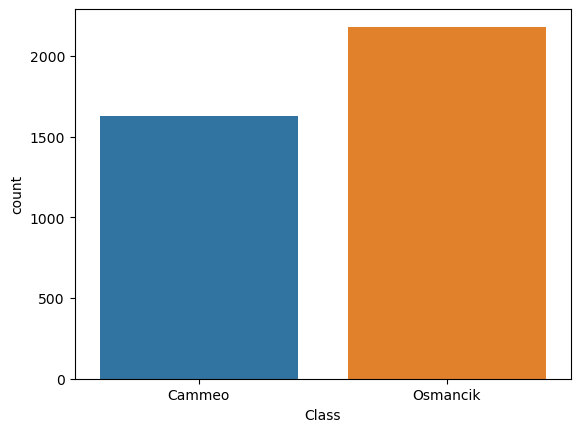

In [99]:
sns.countplot(x="Class", data=df);

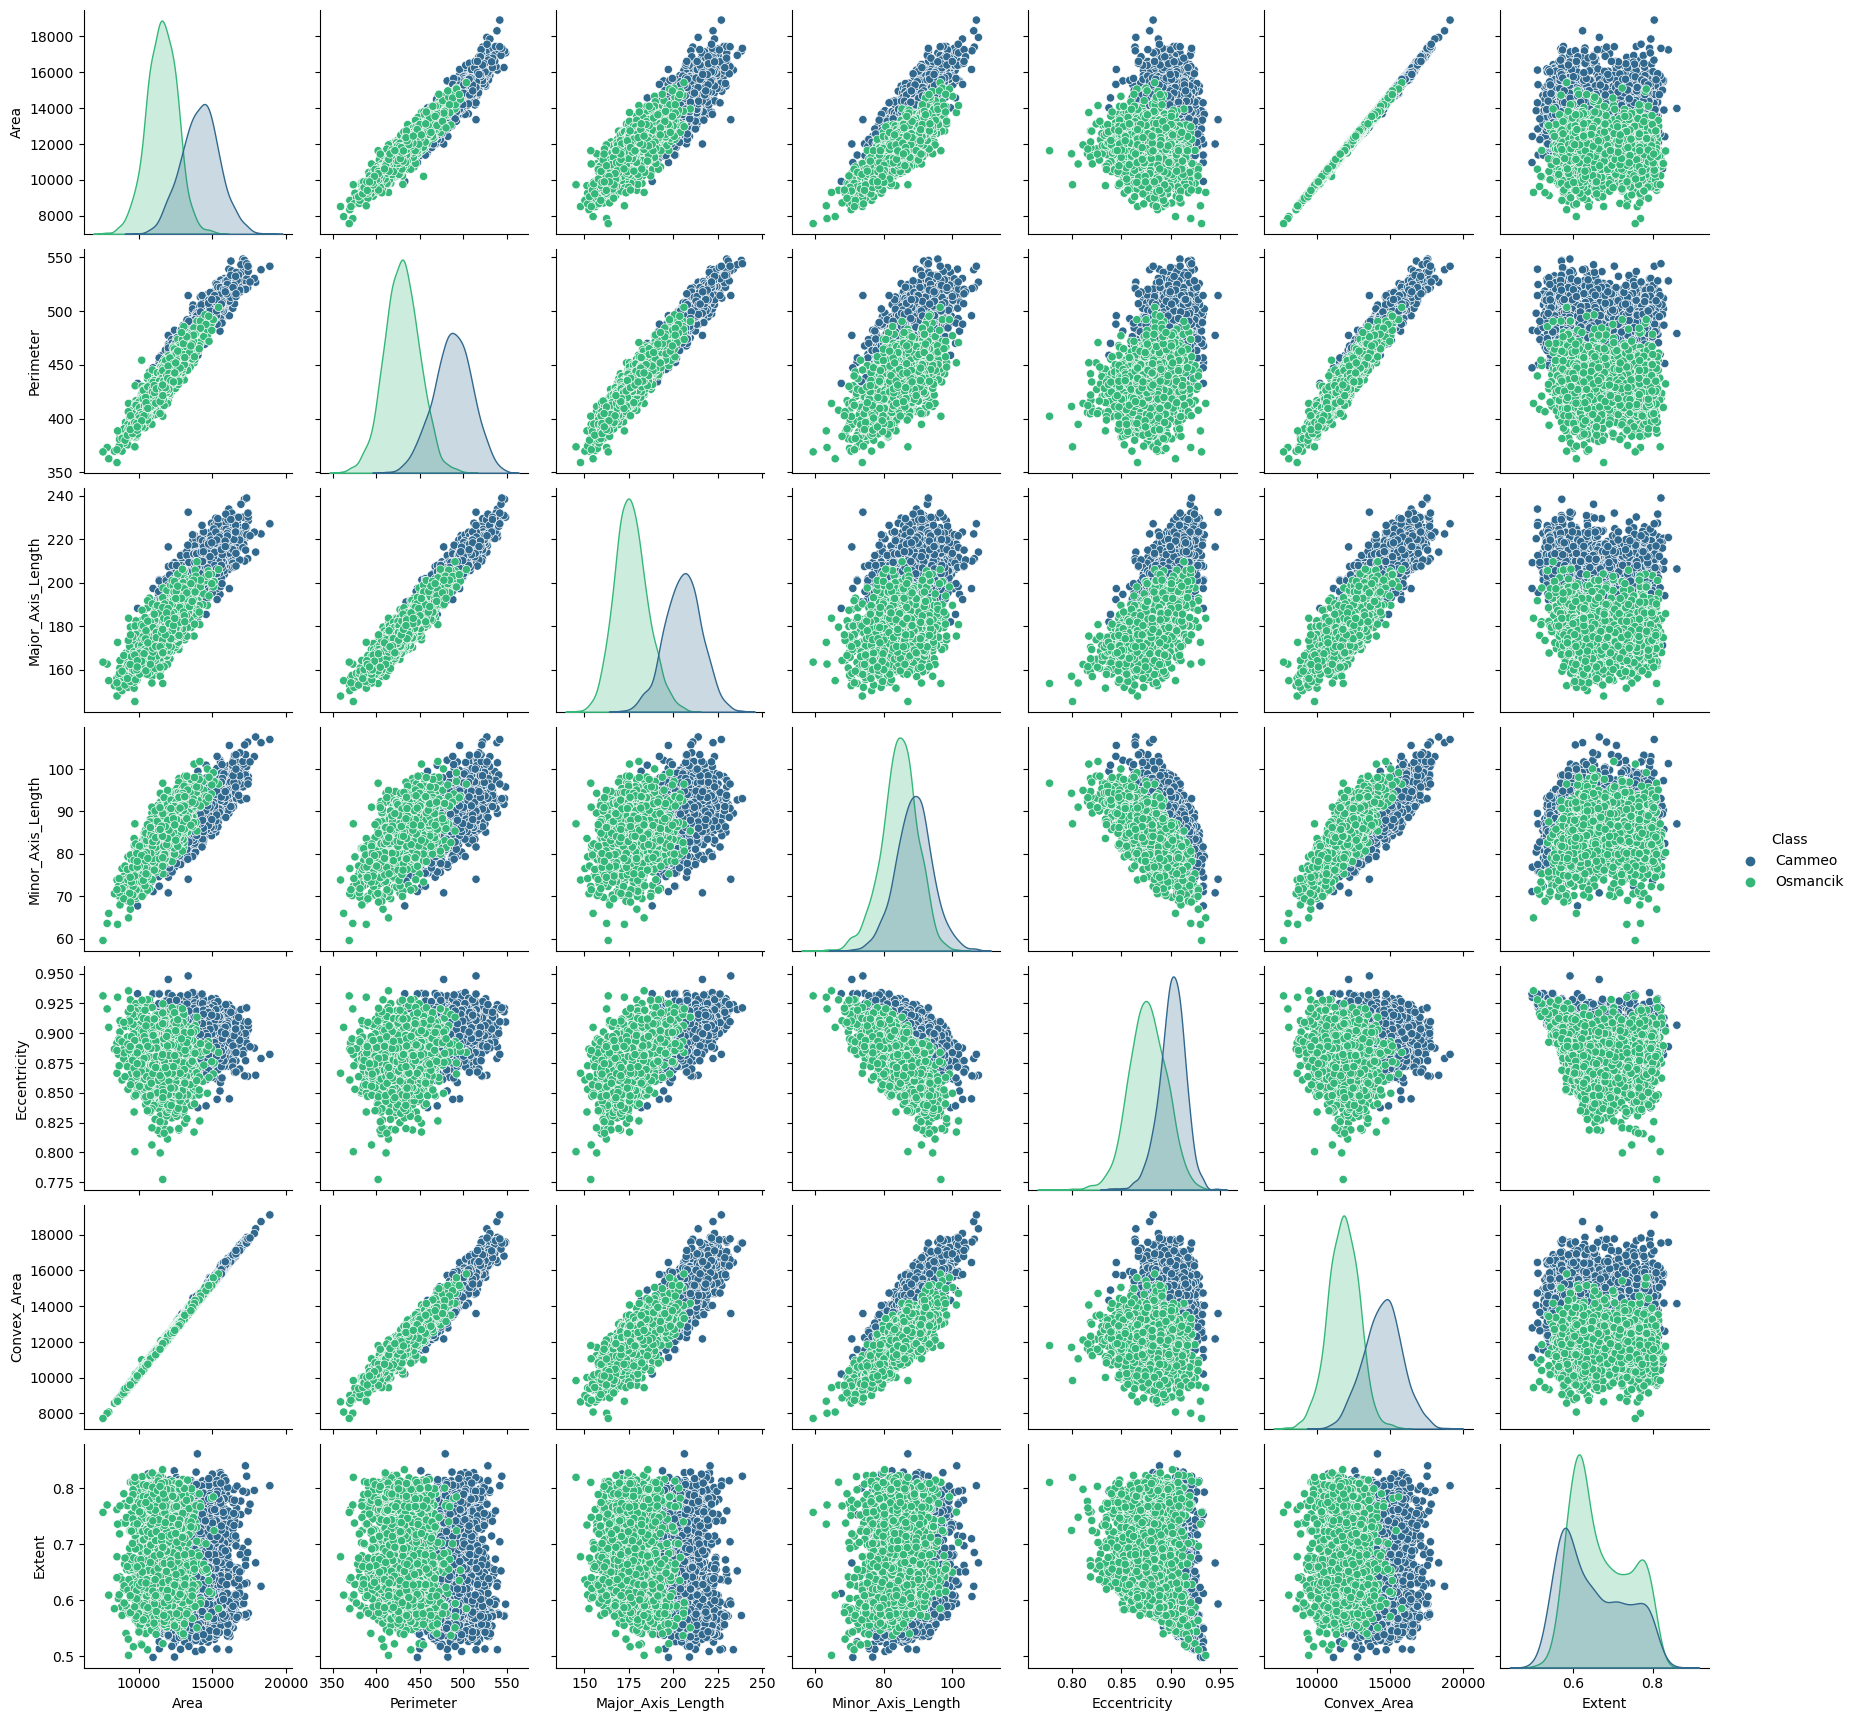

In [100]:
sns.pairplot(df, hue="Class", palette="viridis");

In [101]:
# Class verisini bir fonkisyon ile sayısal hale getiriyorum.
def label_encoder(y):
    le = LabelEncoder()
    df[y] = le.fit_transform(df[y])

label_list = ["Class"]
for l in label_list:
    label_encoder(l)

In [103]:
# Korelasyon değerleri 
df.corr(numeric_only=True)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184,-0.746400
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923,-0.806572
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562,-0.827824
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366,-0.370355
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580,-0.588916
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826,-0.750424
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000,0.117727
Class,-0.746400,-0.806572,-0.827824,-0.370355,-0.588916,-0.750424,0.117727,1.000000


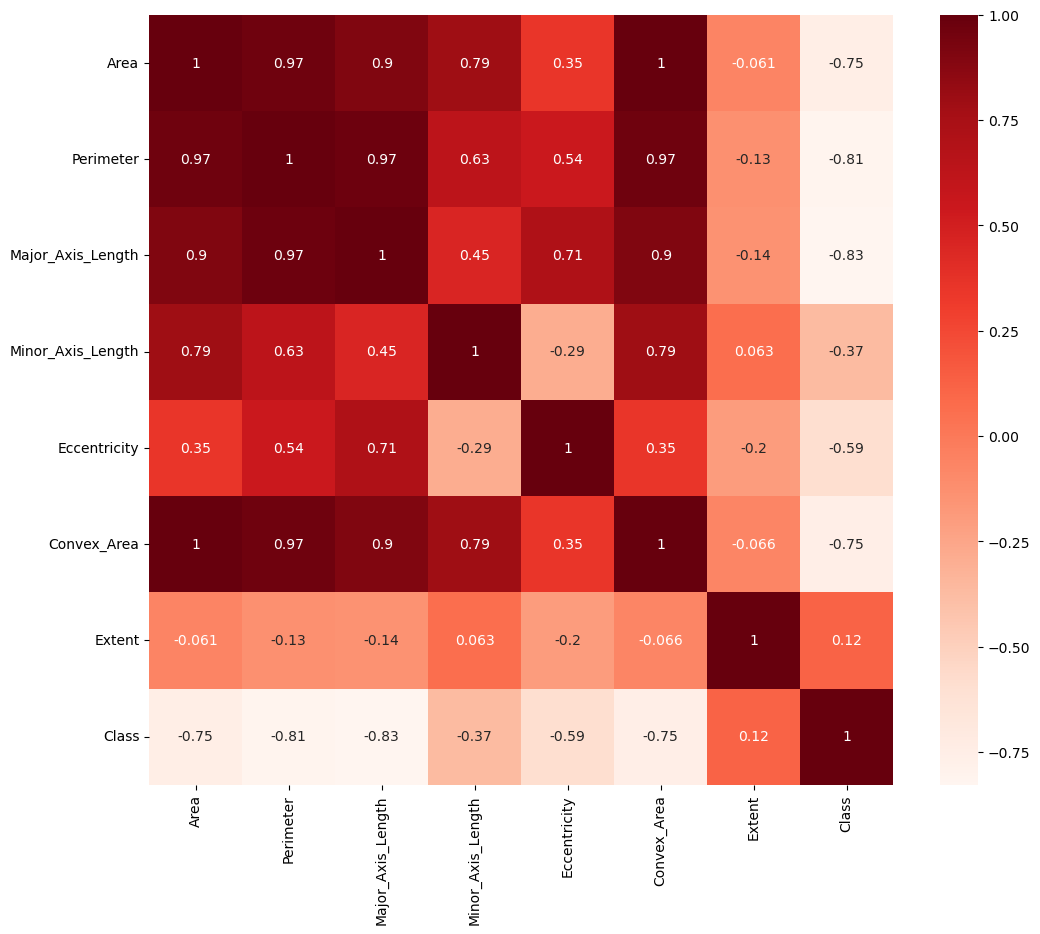

In [104]:
plt.figure(figsize=(12,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show;

In [105]:
df.head(3)

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,0
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,0
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,0


In [106]:
# Hedef değişken ve bağımsız değişkenleri atıyorum
X = df.drop("Class", axis=1)
y = df["Class"]

# Bağımsız değişkenleri yeniden ölçeklendiriyorum.
s_scaller = StandardScaler()
X = s_scaller.fit_transform(X)

# Veri setini eğitim ve test verisi olarak ayırıyorum.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 1)

print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

In [109]:
# Skorları saklayacağım sözlük yapılarını oluşturuyorum (daha sonra verileri tablo olarak gözlemleyeceğiz).
result_train = {}
result_test = {}

------------------------------

* Çeşitli sınıflandırma yöntemleriyle modeller oluşturacağım. Her modeli ızgara yöntemiyle ayrıca tekrar kuracağım.
    * Logistic Regression
    * KNN Classifier 
    * Decision Tree Classifier
    * Random Forest
    * SVM Classifier

# Logistic Regression 

In [110]:
# Logistic regression ile model kurma
# CV değerini 5 veriyorum(her model için 5 vereceğim).
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
accuracies = cross_val_score(lr, X_train, y_train, cv=5)
lr.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies)) # 5 skorun ortalaması
print("Test Score:",lr.score(X_test,y_test))

Train Score: 0.9283836105431064
Test Score: 0.9300087489063867


In [111]:
# Skorları yukarıda oluşturduğum sözlüklere ekliyorum.
result_train["Log. Reg. Default Train Score"] = np.mean(accuracies)
result_test["Log. Reg. Default Test Score"] = lr.score(X_test,y_test)

# Log. Reg. With GridSearchCV

In [112]:
# Grid search ile modeli tekrar kuruyorum.
grid = {'penalty': ['l1','l2'],
        'C': [0.001,0.01,0.1,1,10,100,1000],
        'max_iter' : [10,100,500,1000]
       }

lr = LogisticRegression()
lr_cv = GridSearchCV(lr,grid,cv=5)
lr_cv.fit(X_train,y_train)

print("Hyperparameters:",lr_cv.best_params_)
print("Train Score:",lr_cv.best_score_)
print("Test Score:",lr_cv.score(X_test,y_test))

Hyperparameters: {'C': 1000, 'max_iter': 100, 'penalty': 'l2'}
Train Score: 0.9295093141078343
Test Score: 0.9343832020997376


In [113]:
# Skorları yukarıda oluşturduğum sözlüklere ekliyorum.
result_train["Log. Reg. GSearch Train Score"] = lr_cv.best_score_
result_test["Log. Reg. GSearch Test Score"] = lr_cv.score(X_test,y_test)

-------------------------
-------------------------

# KNN Classifier

In [114]:
# KNN ile model kurma
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
accuracies = cross_val_score(knn, X_train, y_train, cv=5)
knn.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",knn.score(X_test,y_test))

Train Score: 0.9190062609355566
Test Score: 0.9230096237970253


In [115]:
result_train["KNN Default Train Score"] = np.mean(accuracies)
result_test["KNN Default Test Score"] = knn.score(X_test,y_test)

# KNN With GridSearchCV

In [116]:
# Grid search ile modeli tekrar kuruyorum.
grid = {'n_neighbors':np.arange(1,120),
        'p':np.arange(1,3),
        'weights':['uniform','distance']
       }

knn = KNeighborsClassifier(algorithm = "auto")
knn_cv = GridSearchCV(knn,grid,cv=5)
knn_cv.fit(X_train,y_train)

print("Hyperparameters:",knn_cv.best_params_)
print("Train Score:",knn_cv.best_score_)
print("Test Score:",knn_cv.score(X_test,y_test))

Hyperparameters: {'n_neighbors': 37, 'p': 2, 'weights': 'distance'}
Train Score: 0.9295100167942044
Test Score: 0.9335083114610674


In [117]:
result_train["KNN GSearch Train Score"] = knn_cv.best_score_
result_test["KNN. GSearch Test Score"] = knn_cv.score(X_test,y_test)

------------------------------
----------------------

# Decision Tree Classifier 

In [118]:
# Decision tree ile model kurma
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=1)
accuracies = cross_val_score(dtc, X_train, y_train, cv=5)
dtc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",dtc.score(X_test,y_test))

Train Score: 0.8826408359157056
Test Score: 0.889763779527559


In [119]:
result_train["Dec. Tree Default Train Score"] = np.mean(accuracies)
result_test["Dec. Tree Default Test Score"] = dtc.score(X_test,y_test)

# Dec. Tree With GridSearchCV

In [120]:
# Grid search ile modeli tekrar kuruyorum.
grid = {'max_leaf_nodes':np.arange(1,100,1),
        'criterion':['gini','entropy']
       }

dtc = DecisionTreeClassifier(random_state=1)
dtc_cv = GridSearchCV(dtc,grid,cv=5)
dtc_cv.fit(X_train,y_train)

print("Hyperparameters:",dtc_cv.best_params_)
print("Train Score:",dtc_cv.best_score_)
print("Test Score:",dtc_cv.score(X_test,y_test))

Hyperparameters: {'criterion': 'gini', 'max_leaf_nodes': 2}
Train Score: 0.9257625903830344
Test Score: 0.9273840769903762


In [121]:
result_train["Dec. Tree GSearch Train Score"] = dtc_cv.best_score_
result_test["Dec. Tree GSearch Test Score"] = dtc_cv.score(X_test,y_test)

------------------------
--------------------

# Random Forest

In [122]:
# Random Forest ile model kurma
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 1)
accuracies = cross_val_score(rfc, X_train, y_train, cv=5)
rfc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",rfc.score(X_test,y_test))

Train Score: 0.9208873523480265
Test Score: 0.9335083114610674


In [123]:
result_train["Ran. For. Default Train Score"] = np.mean(accuracies)
result_test["Ran. For. Default Test Score"] = rfc.score(X_test,y_test)

# Ran. For. With GridSearchCV

In [124]:
# Grid search ile modeli tekrar kuruyorum.
grid = {'n_estimators':np.arange(100,1000,100),
        'criterion':['gini','entropy'] 
       }

rf = RandomForestClassifier(random_state = 42)
rf_cv = GridSearchCV(rf,grid,cv=5)
rf_cv.fit(X_train,y_train)

print("Hyperparameters:",rf_cv.best_params_)
print("Train Score:",rf_cv.best_score_)
print("Test Score:",rf_cv.score(X_test,y_test))

Hyperparameters: {'criterion': 'entropy', 'n_estimators': 200}
Train Score: 0.9201368833048745
Test Score: 0.926509186351706


In [125]:
result_train["Ran. For. GridSearch Train Score"] = rf_cv.best_score_
result_test["Ran. For. GridSearch Test Score"] = rf_cv.score(X_test,y_test)

--------------------------
----------------------

# SVM Classifier

In [126]:
# SVM Classifier ile model kurma
from sklearn.svm import SVC

svc = SVC(random_state = 1)
accuracies = cross_val_score(svc, X_train, y_train, cv=5)
svc.fit(X_train,y_train)

print("Train Score:",np.mean(accuracies))
print("Test Score:",svc.score(X_test,y_test))

Train Score: 0.9261343114727604
Test Score: 0.9291338582677166


In [127]:
result_train["SVM Default Train Score"] = np.mean(accuracies)
result_test["SVM Default Test Score"] = svc.score(X_test,y_test)

# SVM Classifier With GridSearchCV

In [128]:
# Grid search ile modeli tekrar kuruyorum.
grid = {'C':[0.01,0.1,1,10],
        'kernel' : ["linear"], #,"poly","rbf","sigmoid"
        'degree' : [1], #,3,5,7
        'gamma' : [0.01,0.1,1]    
}

svm  = SVC ();
svm_cv = GridSearchCV(svm, grid, cv = 5)
svm_cv.fit(X_train,y_train)
print("Best Parameters:",svm_cv.best_params_)
print("Train Score:",svm_cv.best_score_)
print("Test Score:",svm_cv.score(X_test,y_test))

Best Parameters: {'C': 10, 'degree': 1, 'gamma': 0.01, 'kernel': 'linear'}
Train Score: 0.9302583777782463
Test Score: 0.9343832020997376


In [129]:
result_train["SVM GridSearch Train Score"] = svm_cv.best_score_
result_test["SVM GridSearch Test Score"] = svm_cv.score(X_test,y_test)

-----------------
----------------

In [130]:
df_train = pd.DataFrame.from_dict(result_train,orient = "index",columns=["R2-Score"])
df_train

,R2-Score
Log. Reg. Default Train Score,0.928384
Log. Reg. GSearch Train Score,0.929509
KNN Default Train Score,0.919006
KNN GSearch Train Score,0.929510
Dec. Tree Default Train Score,0.882641
Dec. Tree GSearch Train Score,0.925763
Ran. For. Default Train Score,0.920887
Ran. For. GridSearch Train Score,0.920137
SVM Default Train Score,0.926134
SVM GridSearch Train Score,0.930258


In [131]:
df_test = pd.DataFrame.from_dict(result_test,orient = "index",columns=["R2-Score"])
df_test

,R2-Score
Log. Reg. Default Test Score,0.930009
Log. Reg. GSearch Test Score,0.934383
KNN Default Test Score,0.923010
KNN. GSearch Test Score,0.933508
Dec. Tree Default Test Score,0.889764
Dec. Tree GSearch Test Score,0.927384
Ran. For. Default Test Score,0.933508
Ran. For. GridSearch Test Score,0.926509
SVM Default Test Score,0.929134
SVM GridSearch Test Score,0.934383
